# Heart Failure Prediction
# Group Members: Godwin Karngong, Temitope Adetunji, Franklin Nkokam Ngongang

## Motivation
#### Heart failure, also known as congestive heart failure, is a condition in which the heart is unable to pump sufficient blood to meet the body's needs. This can occur for a variety of reasons, including damage to the heart muscle due to a heart attack or other condition, or problems with the heart's structure that make it difficult for the heart to function properly.	There are different risk factors that can increase the chances of developing heart failure. One of the risk factors is high blood pressure. High blood pressure can cause damage to the heart and increase the chances of a hear failure. Another risk factor is Diabetes, high blood sugar levels can damage the blood vessels and nerves that are controlling the heart, which in turn increases the likelihood of a heart failure. A third risk factor is age, as you age your muscles start to weaken which can increase the risk of heart failure in the muscles of the heart. Anemia is also a increases the risk of heart failure by causing cardiac stress further adding stress to the heart. Other risk factors for heart failure includes smoking, sex, serum sodium levels, serum creatinine levels, platelets levels, creatinine phosphokinase levels and previous family history of heart failure.



#### Cardiovascular diseases (CVD) are the number one cause of death globally, killing over 17 million people every year. This accounts for 31% of deaths worldwide. Creating a model to predict mortality caused by heart failure can be of great use to prevent this high numbers of mortality every year. People with cardiovascular diseases or who are of high risk (due to the presence of one or many risk factors such as hypertension, diabetes or other diseases) will benefit from early detection, prevention and management wherein a data science and machine learning model can help greatly. Understanding this data will help physicians and other healthcare workers around the world treat their patients better. Improving the overall health of the people from different cultures and countries.	



#### Importing pandas which is help open the file and work with relational or labeled data both easily and intuitively. We are also importing numpy which will help can access and manipulate data in arrays very efficiently. Importing Seaborn will provides a high-level interface for drawing attractive and informative statistical graphics while representing our data. Importing math plotlib will help show plot our data using different graphs, bar plots and so on 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

### Using the python panda library to read and extract the dataset. This will retrieve data in the form of the Dataframe and allow data visualization, We will also call the head() function will show a preview our data in rows and columns

In [53]:
dataset = 'heart_failure_clinical_records_dataset.csv'
df=pd.read_csv(dataset)
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Calculating the mean age of the participants in this study. As we know age is the biggest indicator of high blood pressure which can increase the chances of heart faliure. This important to understand as age is one of the risk factors that cannot be controlled 

In [43]:
df2 = df["age"].mean()
df2

60.83389297658862

### This plot shows the different ages and how frequent each age is in our data set. Although our average age is 60.83, This graph shows that people all the way from the ages 40 to age 95 were present in this data. We can also visualize a the highest age count in age 60, also a high count for ages 45,65 and 70

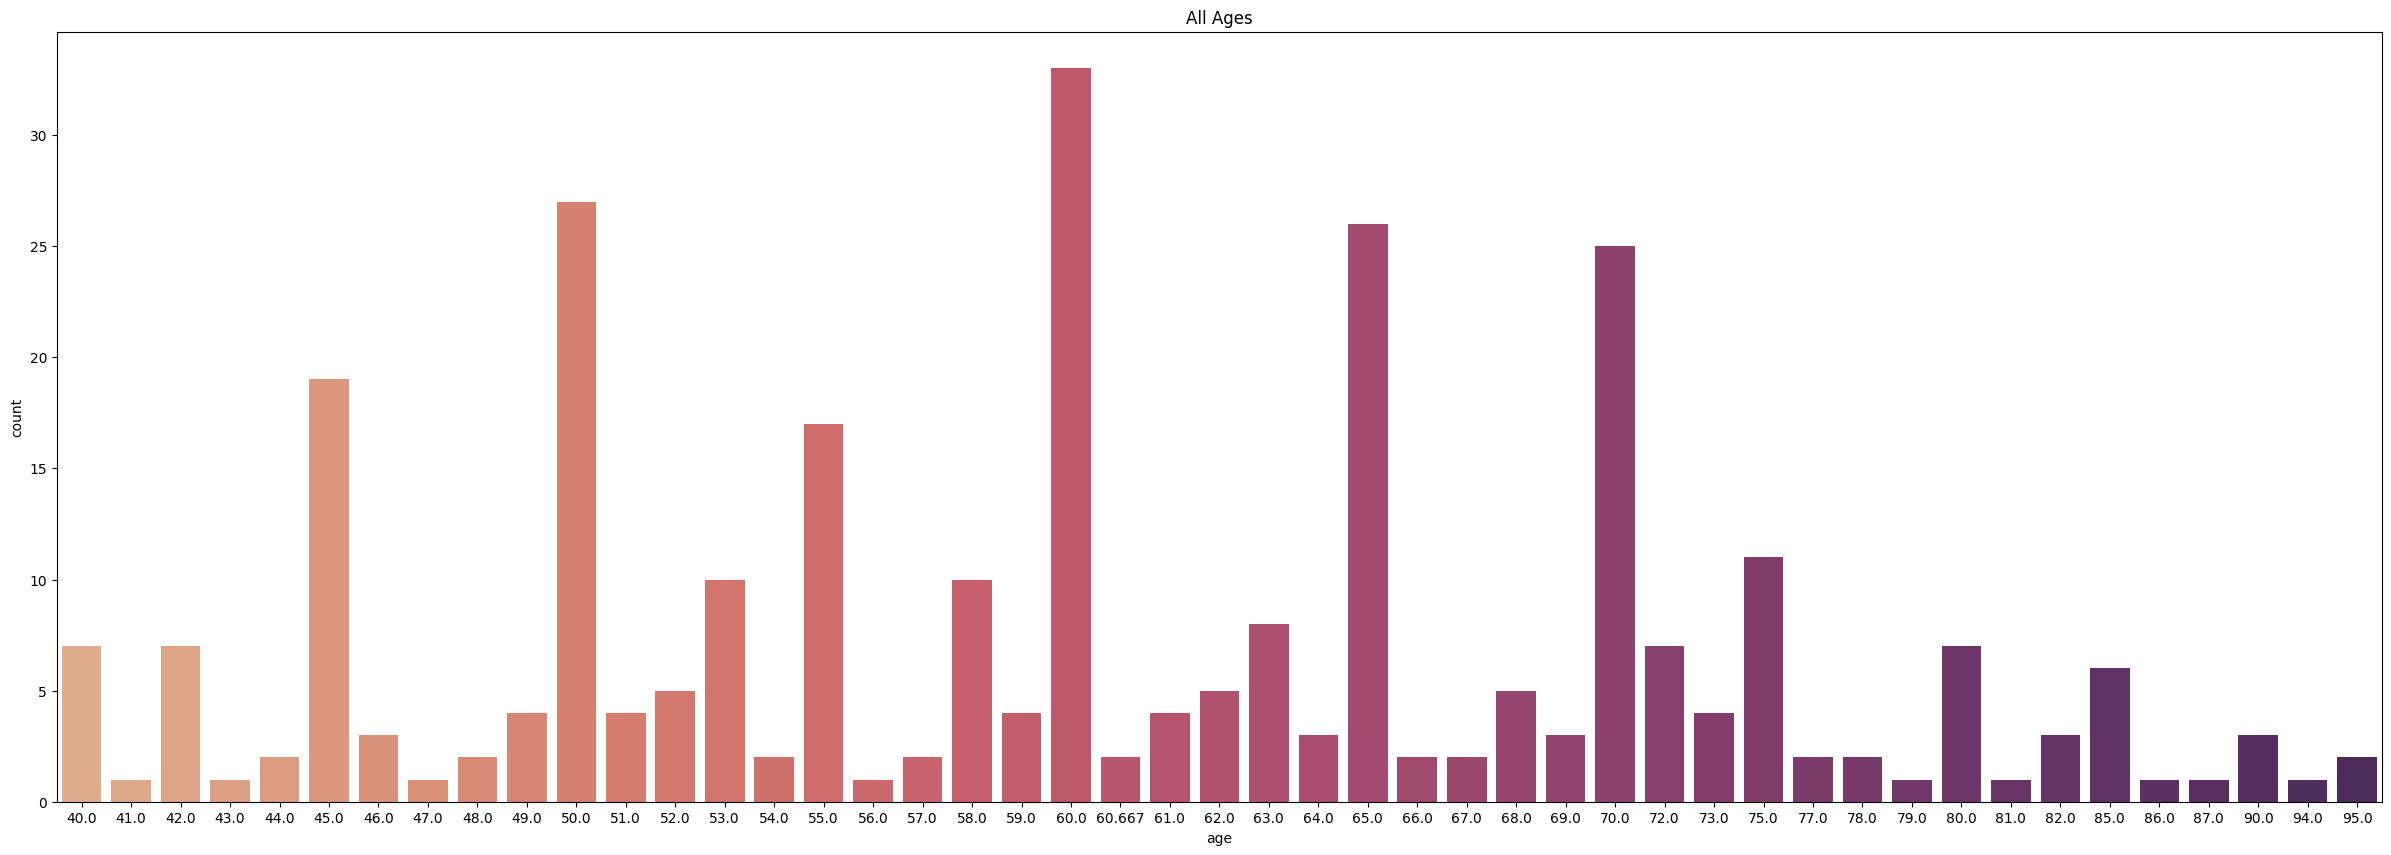

In [70]:
plt.subplots(figsize=(30,10))
sns.countplot(data=df,x='age',palette="flare")
plt.title( 'All Ages')
plt.show()

In [59]:
df.drop_duplicates(inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [31]:
df.shape

(299, 13)

In [32]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [33]:
df.duplicated().sum()

0

### For each of the risk factors here we are showing thenumber of unique values for each column which shows the risk factors in this data set 

In [56]:
x = []
y = []
features=df.columns
for feature in features:
     x.append(feature)
     y.append(df[feature].mean())
     print(f'{feature} = {df[feature].nunique()}')

# plt.xlabel('Users')
# plt.ylabel('Language')  
# plt.plot(x,y)

     



age = 47
anaemia = 2
creatinine_phosphokinase = 208
diabetes = 2
ejection_fraction = 17
high_blood_pressure = 2
platelets = 176
serum_creatinine = 40
serum_sodium = 27
sex = 2
smoking = 2
time = 148
DEATH_EVENT = 2


### Scatterplot between continuous variables and density distribution it can check correlation between continuous variables by output

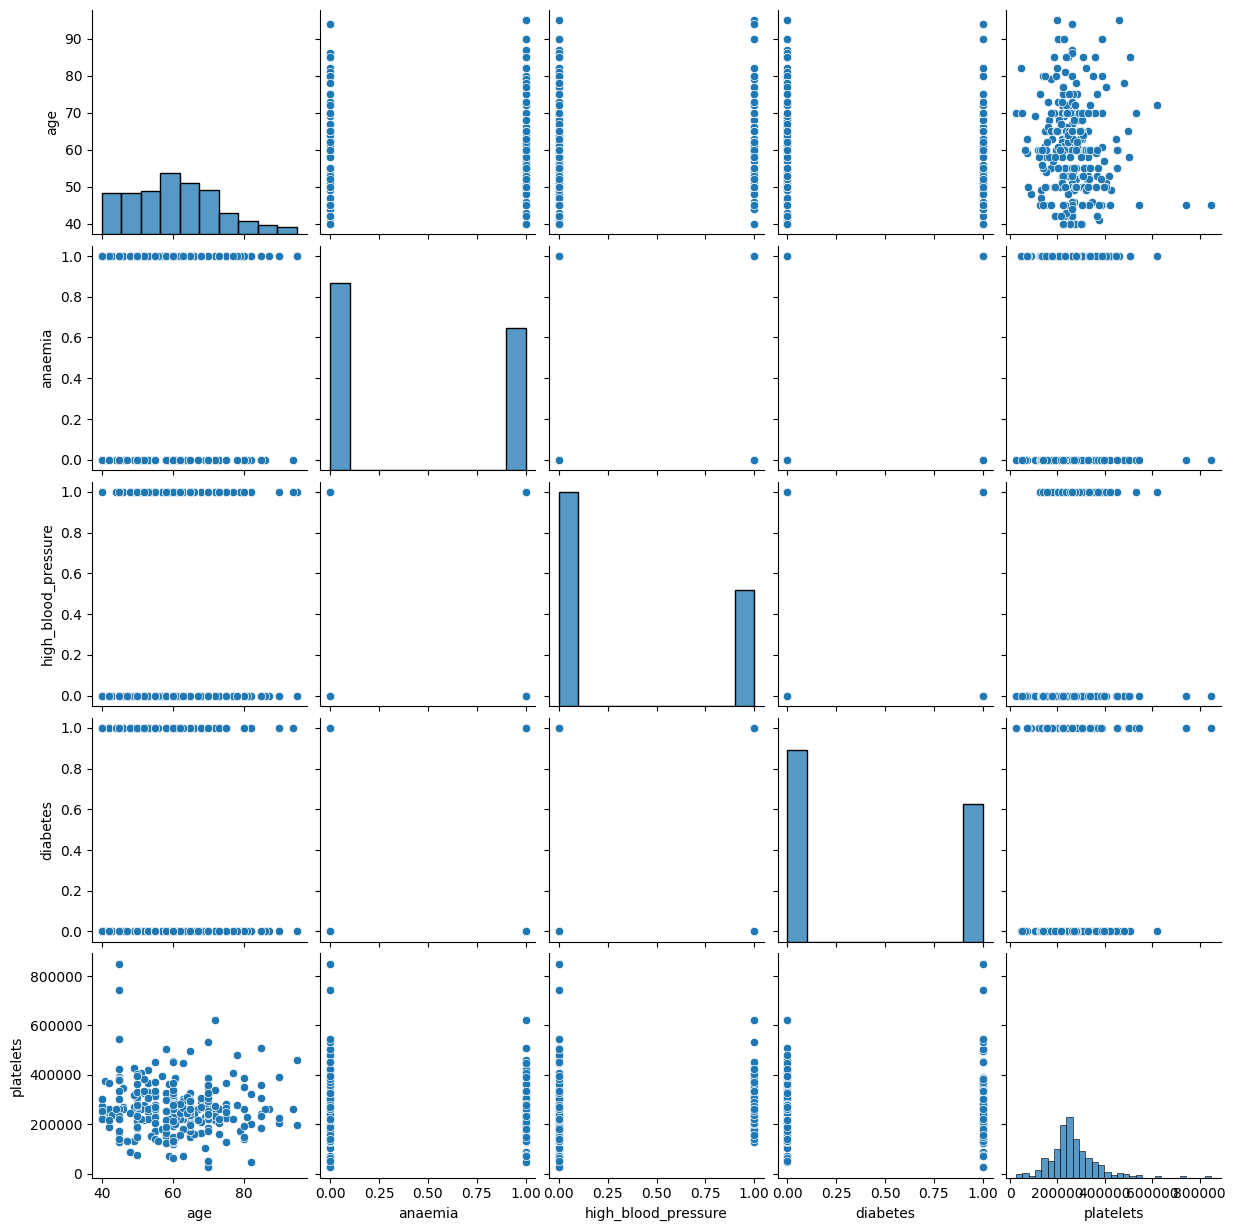

In [58]:

continous_var = ["age","anaemia","high_blood_pressure","diabetes","platelets"] 
sns.pairplot(df[continous_var])

In [74]:
data2 = df.describe()
data2.T.sort_values(ascending =0,by='mean').style.background_gradient(cmap='BuGn').bar(subset=['std'], color='pink').bar(subset=['mean'], color='purple')

,count,mean,std,min,25%,50%,75%,max
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
time,299.000000,130.260870,77.614208,4.000000,73.000000,115.000000,203.000000,285.000000
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000


In [71]:
# This is the part I end with 
# Temi End 

df.corr().style.background_gradient(cmap='flare')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot: xlabel='age'>

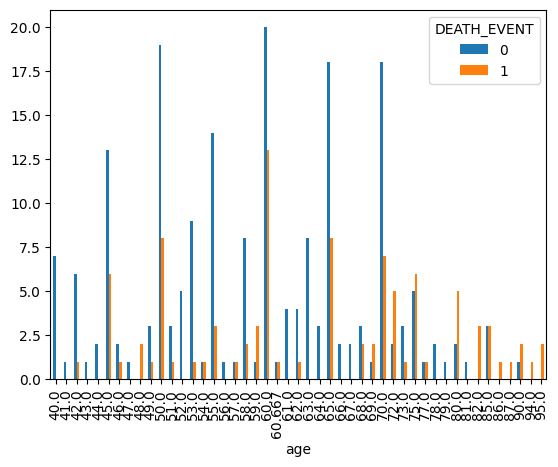

In [37]:
pd.crosstab(df['age'], df['DEATH_EVENT']).plot(kind='bar')

In [38]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot: xlabel='smoking', ylabel='count'>

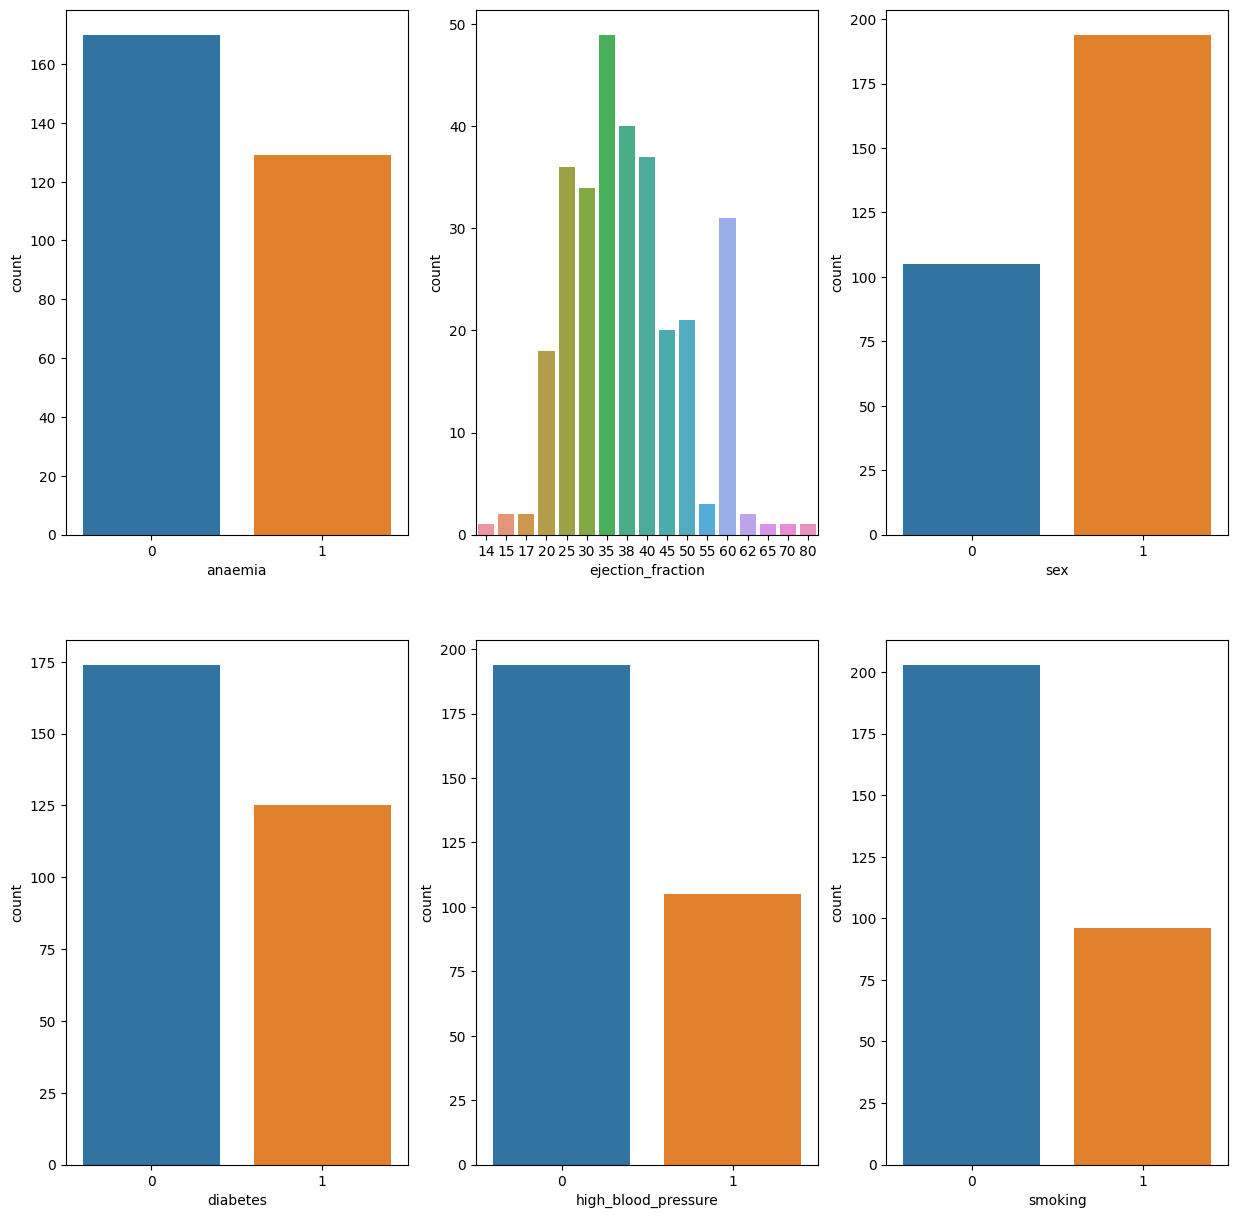

In [39]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

#fig, axes = plt.subplots((2, 2),figsize=(15, 15))

#create chart in each subplot
#sns.boxplot(data=df, x='age', y='DEATH_EVENT', ax=ax[0,0])
sns.countplot(x='anaemia',data=df,  ax=ax[0,0])
#sns.countplot(x='creatinine_phosphokinase',data=df,  ax=ax[1,0])
sns.countplot(x='diabetes',data=df,  ax=ax[1,0])
sns.countplot(x='ejection_fraction',data=df,  ax=ax[0,1])
sns.countplot(x='high_blood_pressure',data=df,  ax=ax[1,1])
#sns.countplot(x='platelets',data=df,  ax=ax[2,1])
#sns.countplot(x='serum_creatinine',data=df,  ax=ax[3,1])
#sns.countplot(x='serum_sodium',data=df,  ax=ax[0,2])
sns.countplot(x='sex',data=df,  ax=ax[0,2])
sns.countplot(x='smoking',data=df,  ax=ax[1,2])
#sns.countplot(x='time',data=df,  ax=ax[3,2])


In [40]:
fig = px.box(df, y="age", x="smoking", color="DEATH_EVENT", points="all",  hover_data=df.columns)
fig.update_layout(title_text="Death depndance on diabetes and smoking")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

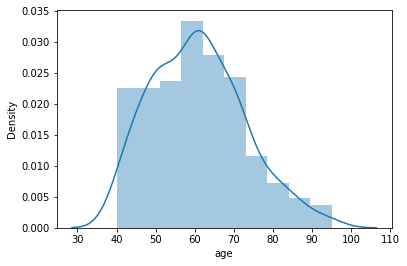

In [ ]:
sns.distplot(df['age'])
plt.show()

In [ ]:
df.groupby('age')[features].mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,,
40.000,40.000,0.285714,321.142857,0.285714,36.428571,0.142857,262428.571429,0.942857,137.714286,0.714286,0.285714,198.285714,0.000000
41.000,41.000,0.000000,148.000000,0.000000,40.000000,0.000000,374000.000000,0.800000,140.000000,1.000000,1.000000,68.000000,0.000000
42.000,42.000,0.285714,908.142857,0.285714,35.714286,0.000000,244051.147143,1.468571,137.142857,0.714286,0.428571,143.428571,0.142857
43.000,43.000,1.000000,358.000000,0.000000,50.000000,0.000000,237000.000000,1.300000,135.000000,0.000000,0.000000,97.000000,0.000000
44.000,44.000,0.000000,333.000000,1.000000,35.000000,1.000000,249179.015000,1.150000,134.500000,1.000000,0.500000,161.500000,0.000000
45.000,45.000,0.210526,1239.000000,0.578947,39.263158,0.263158,331300.845263,1.024211,137.578947,0.631579,0.157895,156.315789,0.315789
46.000,46.000,0.333333,392.666667,0.333333,30.666667,0.666667,294119.343333,1.393333,133.666667,0.000000,0.000000,105.333333,0.333333
47.000,47.000,0.000000,582.000000,0.000000,25.000000,0.000000,130000.000000,0.800000,134.000000,1.000000,0.000000,201.000000,0.000000
48.000,48.000,1.000000,356.500000,1.000000,42.500000,0.500000,165500.000000,1.750000,125.500000,0.000000,0.000000,104.000000,1.000000


In [ ]:
true_anaemia = df[df["sex"]==1]
false_anaemia = df[df["sex"]==0]

true_anaemia_nodeath = true_anaemia[df["DEATH_EVENT"]==0]
true_anaemia_death = true_anaemia[df["DEATH_EVENT"]==1]
false_anaemia_nodeath = false_anaemia[df["DEATH_EVENT"]==0]
false_anaemia_death = false_anaemia[df["DEATH_EVENT"]==1]

labels = ['true_anaemia_nodeath','true_anaemia_death', 'false_anaemia_nodeath', 'false_anaemia_death']
values = [len(true_anaemia[df["DEATH_EVENT"]==0]),len(true_anaemia[df["DEATH_EVENT"]==1]),
         len(false_anaemia[df["DEATH_EVENT"]==0]),len(false_anaemia[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Anaemia analysis")
fig.show()

In [ ]:
true_smoking = df[df["sex"]==1]
false_smoking = df[df["sex"]==0]

true_smoking_nodeath = true_smoking[df["DEATH_EVENT"]==0]
true_smoking_death = true_smoking[df["DEATH_EVENT"]==1]
false_smoking_nodeath = false_smoking[df["DEATH_EVENT"]==0]
false_smoking_death = false_smoking[df["DEATH_EVENT"]==1]

labels = ['true_smoking_nodeath','true_smoking_death', 'false_smoking_nodeath', 'false_smoking_death']
values = [len(true_smoking[df["DEATH_EVENT"]==0]),len(true_smoking[df["DEATH_EVENT"]==1]),
         len(false_smoking[df["DEATH_EVENT"]==0]),len(false_smoking[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="smoking analysis")
fig.show()

In [ ]:
df.time.mean(),df.time.std()

(130.2608695652174, 77.61420795029339)

In [ ]:
upperlimit =df.time.mean()+df.time.std()
lowerlimit =df.time.mean()-df.time.std()

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
cols_to_scale = ['age',  'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
X=df.drop(['DEATH_EVENT'],axis='columns')
y=df['DEATH_EVENT']

In [ ]:
X.shape

(299, 12)

In [ ]:
y.shape

(299,)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=5)

# Machine learing analysis

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


model_params = {
             
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
   'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }   
    },
    
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    } 
        
     
}


In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.820000,{'n_estimators': 5}
1,logistic_regression,0.810000,{'C': 5}
2,svm,0.830000,"{'C': 1, 'kernel': 'linear'}"
3,naive_bayes_gaussian,0.756667,{}
4,naive_bayes_multinomial,0.663333,{}
5,decision_tree,0.786667,{'criterion': 'entropy'}
6,XGB_Classifier,0.840000,{'base_score': 0.5}


In [ ]:
model=svm.SVC()
model.fit(X_train, y_train)


SVC()

In [ ]:
model.score( X_test, y_test)

0.8536585365853658

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted[:5]

array([0, 1, 1, 1, 1])

In [ ]:
y_test[:5]

284    0
71     0
49     1
335    1
43     0
Name: DEATH_EVENT, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.82      0.90      0.86        40

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82



In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print(f'{mean_squared_error}: {mse}')

<function mean_squared_error at 0x7f0f70062ca0>: 0.14634146341463414


Text(69.0, 0.5, 'Truth')

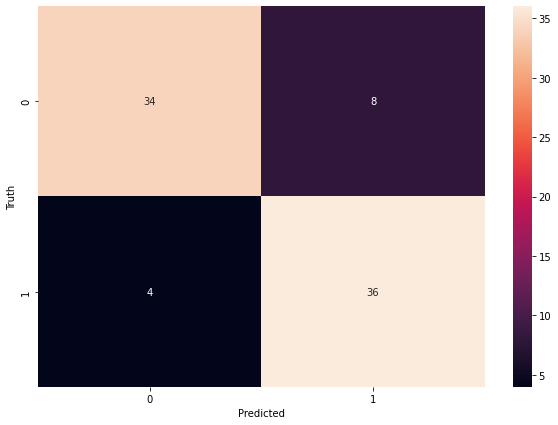

In [ ]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Deep learing analysis

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
mode = keras.Sequential([
    keras.layers.Dense(64, input_dim=12, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(1, activation='sigmoid')
])

mode.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history =mode.fit(X_train, y_train, epochs=100,verbose=2 ,batch_size=4)

Epoch 1/100
81/81 - 2s - loss: 0.7173 - accuracy: 0.5154 - 2s/epoch - 25ms/step
Epoch 2/100
81/81 - 0s - loss: 0.7149 - accuracy: 0.5154 - 154ms/epoch - 2ms/step
Epoch 3/100
81/81 - 0s - loss: 0.6958 - accuracy: 0.5123 - 187ms/epoch - 2ms/step
Epoch 4/100
81/81 - 0s - loss: 0.7042 - accuracy: 0.5154 - 188ms/epoch - 2ms/step
Epoch 5/100
81/81 - 0s - loss: 0.6932 - accuracy: 0.5494 - 196ms/epoch - 2ms/step
Epoch 6/100
81/81 - 0s - loss: 0.7003 - accuracy: 0.5154 - 141ms/epoch - 2ms/step
Epoch 7/100
81/81 - 0s - loss: 0.6962 - accuracy: 0.5031 - 164ms/epoch - 2ms/step
Epoch 8/100
81/81 - 0s - loss: 0.6888 - accuracy: 0.5710 - 154ms/epoch - 2ms/step
Epoch 9/100
81/81 - 0s - loss: 0.6955 - accuracy: 0.5000 - 168ms/epoch - 2ms/step
Epoch 10/100
81/81 - 0s - loss: 0.6900 - accuracy: 0.5123 - 163ms/epoch - 2ms/step
Epoch 11/100
81/81 - 0s - loss: 0.6861 - accuracy: 0.5494 - 179ms/epoch - 2ms/step
Epoch 12/100
81/81 - 0s - loss: 0.6962 - accuracy: 0.4568 - 163ms/epoch - 2ms/step
Epoch 13/100
81

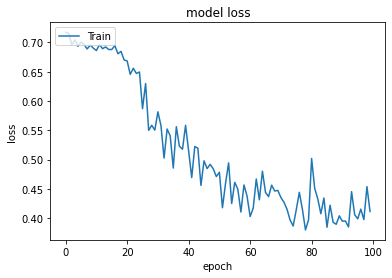

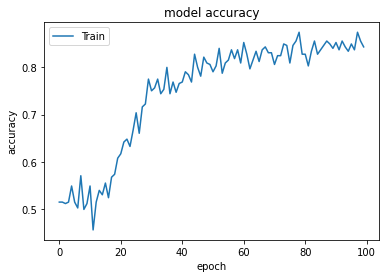

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
mode.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.3183 - accuracy: 0.8659


[0.31828296184539795, 0.8658536672592163]

In [ ]:
y_predicated=mode.predict(X_test).reshape(-1)


3/3 [==============================] - 0s 4ms/step


In [ ]:
y_predicated=np.round(y_predicated)
#y_predicated

In [ ]:
print(classification_report(y_test, y_predicated))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.89      0.82      0.86        40

    accuracy                           0.87        82
   macro avg       0.87      0.86      0.87        82
weighted avg       0.87      0.87      0.87        82



Text(42.0, 0.5, 'Truth')

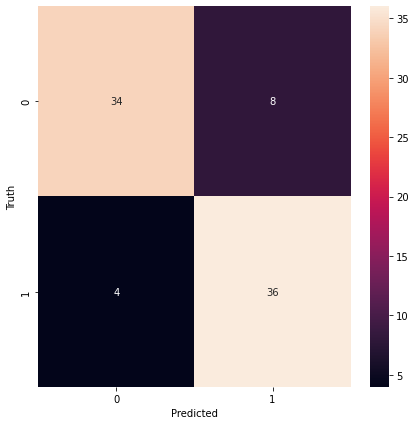

In [ ]:
y_predicated = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicated)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
xp = model.predict(X_train)

In [ ]:
Y_pre = np.append(xp, y_predicated)
model_resul = pd.DataFrame(Y_pre)


Text(0, 0.5, 'cases_number')

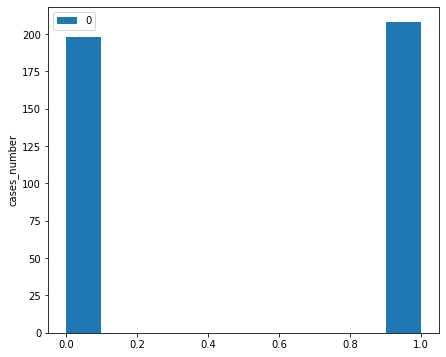

In [ ]:
model_resul.plot.hist(figsize=(7,6))

plt.ylabel('cases_number')